# Pandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Topmentor/Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [ ]:
data.shape

(400, 11)

In [ ]:
data.isnull().sum()

,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0


In [ ]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
data[["ShelveLoc", "Urban", "US"]].value_counts()

ShelveLoc  Urban  US 
Medium     Yes    Yes    96
                  No     55
Bad        Yes    Yes    51
Good       Yes    Yes    39
Medium     No     Yes    39
                  No     29
Bad        Yes    No     23
Good       No     Yes    22
           Yes    No     18
Bad        No     No     11
                  Yes    11
Good       No     No      6
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder = LabelEncoder

In [ ]:
print(label_encoder)

<class 'sklearn.preprocessing._label.LabelEncoder'>


In [ ]:
label_encoder_urban = LabelEncoder()
label_encoder_us = LabelEncoder()

In [ ]:
data["Urban"] = label_encoder_urban.fit_transform(data["Urban"])
data["US"] = label_encoder_us.fit_transform(data["US"])
data["ShelveLoc"] = label_encoder_us.fit_transform(data["ShelveLoc"])

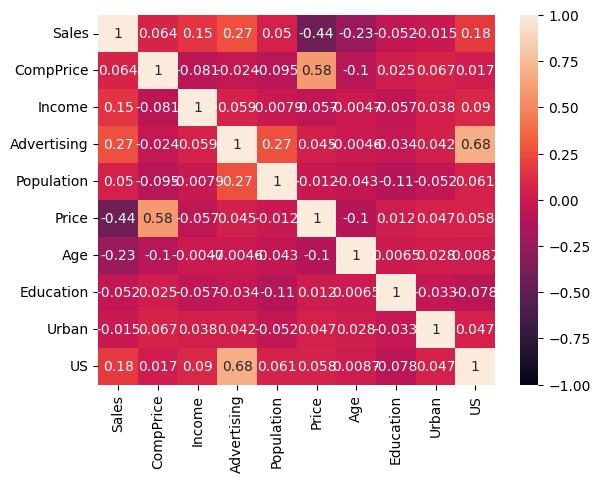

In [ ]:
sns.heatmap(data[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban', 'US']].corr(),vmin=-1,annot=True)
plt.show()

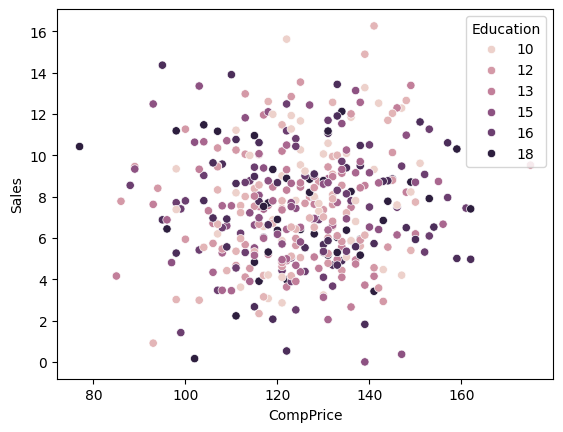

In [ ]:
sns.scatterplot(x = data["CompPrice"], y = data["Sales"], hue = data["Education"])
plt.show()

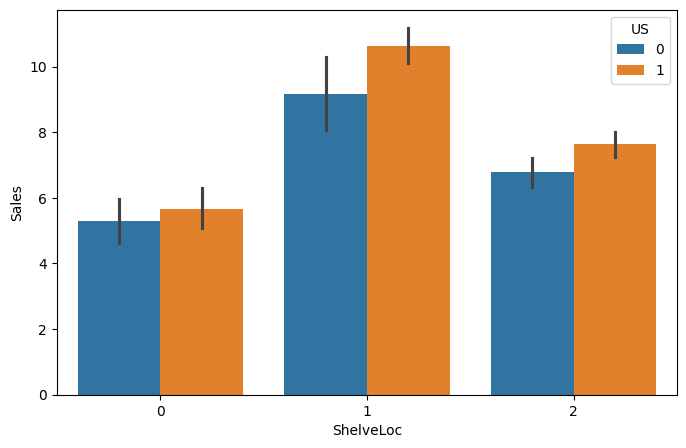

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x='ShelveLoc', y ='Sales', hue='US', data = data)
plt.show()

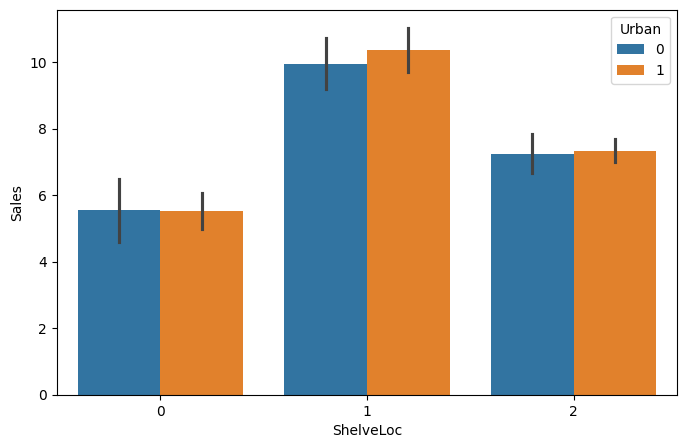

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x='ShelveLoc', y ='Sales', hue='Urban', data = data)
plt.show()

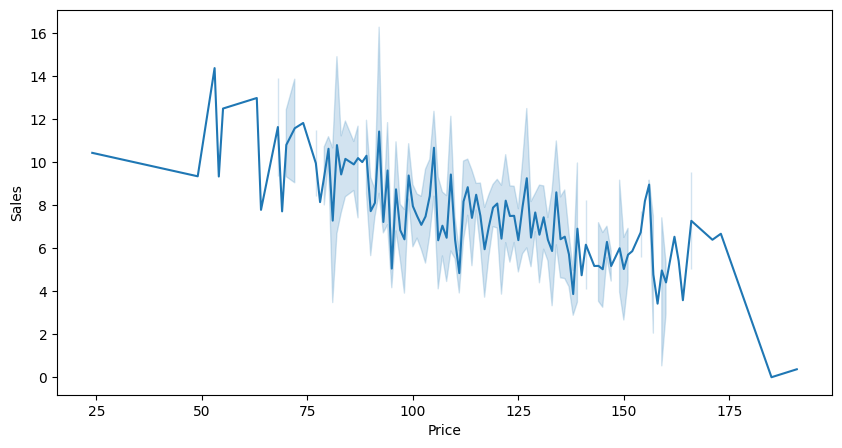

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Price', y ='Sales', data = data)
plt.show()

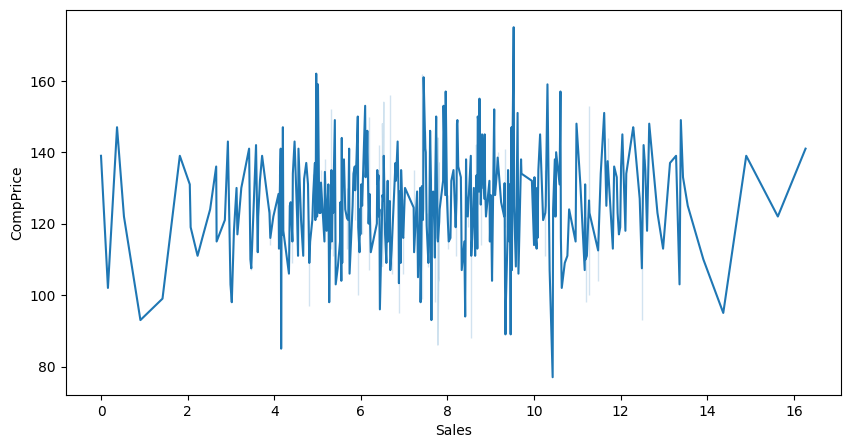

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Sales', y ='CompPrice', data = data)
plt.show()

In [ ]:
X = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
X.head()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [ ]:
y = data['Sales']
y.head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


In [ ]:
!pip Install import-ipynb

ERROR: unknown command "Install" - maybe you meant "install"


In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
x,y = make_classification(n_samples=3000, n_features=10,n_classes=2, random_state=42)
print(x.shape)
print(y.shape)

(3000, 10)
(3000,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=123)

In [ ]:
x_train.shape

(2400, 10)

In [ ]:
RandomForest_model = RandomForestClassifier()

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.9866666666666667


In [ ]:
y_pred_randomforest = RandomForest_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_pred_randomforest = RandomForest_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred_randomforest)

array([[295,   6],
       [  2, 297]])

In [ ]:
accuracy_score(y_test,y_pred_randomforest)

0.9866666666666667